In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

#from google.colab import drive
#drive.mount('/content/drive/', force_remount=True)

from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC

Mounted at /content/drive/


In [2]:
df_label = pd.read_excel("dataset_FINAL_afterPreprocessing.xlsx")
df_label = df_label['LabelFinal']

In [3]:
#SIMILARITY TOP AND CORPUS IN SCENARIO IV
    #Corpus: Tweet and Tweet + Berita
    #Top: 1, 5, 10
df_tfidf = pd.read_csv("fe_TFIDF_df_top1_tweet.csv")
df_tfidf.drop('Unnamed: 0', axis=1, inplace=True)
df_tfidf

,aamiin,abai,abang,abdi,abdul,abis,abu,abu waras,abur,abuse,...,zhico,zina,zoelfick,zon,zrn,zulfiarrahman,zulkiflilubis,zumhana,zusen,zusen tahan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df_tfidf, df_label, test_size=0.1)

In [ ]:
classifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
classifier.fit(train_x, train_y)

SVC(gamma='auto', kernel='linear')

In [ ]:
predictions = classifier.predict(test_x)

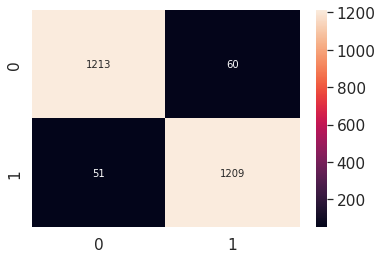

In [ ]:
def plot_confussion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()

plot_confussion_matrix(test_y, predictions)

In [ ]:
print(classification_report(test_y, predictions, digits=6))

              precision    recall  f1-score   support

         0.0   0.959652  0.952867  0.956248      1273
         1.0   0.952719  0.959524  0.956109      1260

    accuracy                       0.956178      2533
   macro avg   0.956185  0.956196  0.956178      2533
weighted avg   0.956203  0.956178  0.956179      2533

